# Classification Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I **Team, JL2**, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### <u>__Predict Overview: EA - Twitter Sentiment Classification 2023-2024__</u>

* To be continued


<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Text Preprocessing</a>

<a href=#five>5. Feature Engineering</a>

<a href=#six>6. Model Training</a>

<a href=#seven>7. Model Evaluation</a>

<a href=#eifght>8. Model Evaluation - Testing set</a>

<a href=#nine>9. Best Model Explanation</a>

# 1. Importing Packages


In [ ]:
# Libraries of loading, manipulation and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for data preparation
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import words
from textblob import TextBlob
from IPython.display import display, HTML


# Libraries for Modeling
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import ElasticNet
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

from sklearn.feature_extraction.text import CountVectorizer


import re
import string
import unicodedata

from wordcloud import WordCloud



# Downloads
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('words')

# Setting global constants to ensure notebook results are reproducible

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

# 2.Loading Data

In [ ]:
# Load the data
df_train = pd.read_csv('train.csv')
df_test =  pd.read_csv('test_with_no_labels.csv')

# 3. Exploratory Data Analysis (EDA)

### 3.1 Dataset Overview

**The tweets are divided into 4 classes:**

- [ 2 ] News : Tweets linked to factual news about climate change.

- [ 1 ] Pro : Tweets that support the belief of man-made climate change.

- [ 0 ] Neutral : Tweets that neither support nor refuse beliefs of climate change.

- [-1 ] Anti : Tweets that do not support the belief of man-made climate change.

In [ ]:
# Shapes, Columns, Data types
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [ ]:
df_test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


### 3.2 Data Dimensionality

In [ ]:
df_train.shape

(15819, 3)

- `Train data` has **15819** rows and **3** columns.

In [ ]:
df_test.shape

(10546, 2)

- `Test data` has **10546** rows and **2** columns.

### 3.3 Information Summmary

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


Notable insight for `Train data`:
-  **Categoric**: **1** column of categorical type [`message`]
-  **Numerical**: **2** columns of Numeric type [`sentiment` & `tweetid`]
- **Null data**: Zero null values

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


Notable insight for `Test data`:
-  **Categoric**: **1** column of categorical type [`message`]
-  **Numerical**: **1** column of Numeric type [`tweetid`]
- **Null data**: Zero null values

### 3.4 Null value analysis

In [ ]:
df_train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [ ]:
df_test.isnull().sum()

message    0
tweetid    0
dtype: int64

- Both `train data` & `test data` have **ZERO** null values.

### 3.5 Sentiment Class Distribution

- The **sentiment class distribution** in a dataset indicates the *frequency* or count of different sentiment categories assigned to instances of text data.
- Analyzing the sentiment class distribution will helps us identify potential challenges, such as **imbalanced classes**.

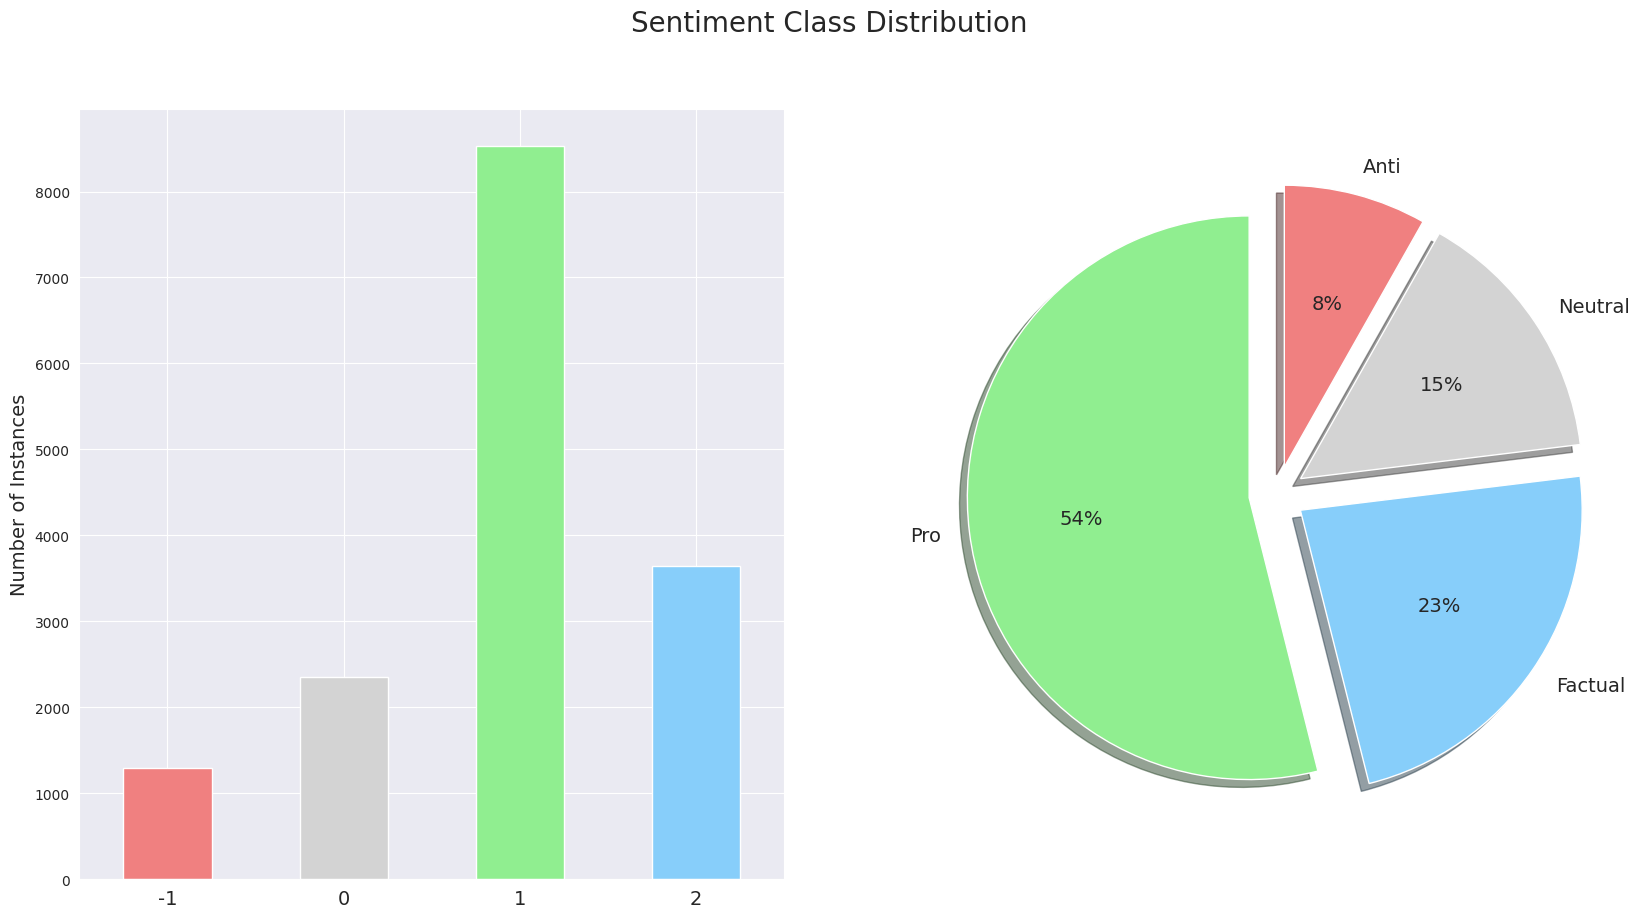

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the color scheme with lighter shades
color_scheme = {'2': 'lightskyblue', '1': 'lightgreen', '0': 'lightgrey', '-1': 'lightcoral'}

# Set Seaborn style
sns.set_style('darkgrid')

fig, axes = plt.subplots(ncols=2,
                         nrows=1,
                         figsize=(20, 10),
                         dpi=100)

# Bar plot with color scheme using pandas
bar_plot = df_train['sentiment'].value_counts().sort_index().plot(kind='bar', color=[color_scheme[str(i)] for i in range(-1, 3)], ax=axes[0])
axes[0].set_ylabel('Number of Instances', fontsize=14)

# Adjust x-axis tick label rotation and make them bold
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=0, fontsize=14)  # Adjust font size

# Pie chart with color scheme
labels_pie = ['Pro', 'Factual', 'Neutral', 'Anti']  # Corrected labels
colors_pie = [color_scheme['1'], color_scheme['2'], color_scheme['0'], color_scheme['-1']]  # Corrected colors
axes[1].pie(df_train['sentiment'].value_counts(),
            labels=labels_pie,
            autopct='%1.0f%%',
            shadow=True,
            startangle=90,
            explode=(0.1, 0.1, 0.1, 0.1),
            colors=colors_pie,
            textprops={'fontsize': 14})  # Adjust font size

fig.suptitle('Sentiment Class Distribution', fontsize=20)
plt.show()


In [ ]:
import pandas as pd

# Assuming df_train is your training DataFrame
class_counts = df_train['sentiment'].value_counts().sort_index()

# Create a DataFrame for the counts
class_counts_df = pd.DataFrame({'Sentiment Class': class_counts.index, 'Count': class_counts.values})

# Display the table
class_counts_df

,Sentiment Class,Count
0,-1,1296
1,0,2353
2,1,8530
3,2,3640


- Notable differences exist in the number of instances for each sentiment class, with `Pro (class 1)` having the **highest** number of observations(**54%**), and `Anti (class -1)` with the **lowest** number of observations(**8%**).
- The imbalance in class frequencies may pose a potential challenge for our machine learning models.

# 4. Text Pre-Processing

- **Preprocessing** in the context of machine learning refers to the steps and techniques applied to raw data before it is used to train a mode.
- The goal of preprocessing is to *clean*, *transform*, and organize the data in a way that makes it suitable for effective and accurate machine learning model training.

---
**Our preprocessing steps include:**

1. Lowercasing
2. Remove URLs and User(@)
3. Remove Punctuation & Special Characters
4. Remove numeric numbers
5. Remove Special Characters & Handle Encoding
6. Remove extra white space & leading space
7. Remove Stopwords
8. Tokenization
9. Lemmatization/Stemming?


### 4.1.1 Combine train & test data

In [ ]:
# Combine training and test data for preprocessing
df_combined = pd.concat([df_train, df_test], axis=0, ignore_index=True)

In [ ]:
# Add a new column 'clean_message' with a copy of the original 'message' next to it
df_combined.insert(df_combined.columns.get_loc('message') + 1, 'clean_message', df_combined['message'].copy())

In [ ]:
df_combined.head()

,sentiment,message,clean_message,tweetid
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1.0,It's not like we lack evidence of anthropogeni...,It's not like we lack evidence of anthropogeni...,126103
2,2.0,RT @RawStory: Researchers say we have three ye...,RT @RawStory: Researchers say we have three ye...,698562
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year...,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...","RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [ ]:
df_combined.shape

(26365, 4)

### 4.1.2 Function basic preprocessing


In [ ]:
def preprocess_text(text):
    # Lowercasing
    text = text.lower()

    # Remove URLs and User(@)
    text = re.sub(r'http\S+|www\S+|https\S+|@[^\s]+', '', text, flags=re.MULTILINE)

    # Remove Punctuation & Special Characters
    text = re.sub(r'[^\w\s]', '', text)

    # Remove numeric numbers
    text = re.sub(r'\d+', '', text)

    # Remove Special Characters & Handle Encoding
    text = ''.join(char for char in unicodedata.normalize('NFKD', text) if not unicodedata.combining(char))

    # Remove extra white space & leading space
    text = ' '.join(text.split())

    # Remove Stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)

    return text

### 4.2 Basic Text cleaning and Formating

- For the set of preprocessing steps 1 to 7

In [ ]:
df_combined['clean_message'] = df_combined['clean_message'].apply(preprocess_text)

In [ ]:
df_combined.head()

,sentiment,message,clean_message,tweetid
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,polyscimajor epa chief doesnt think carbon dio...,625221
1,1.0,It's not like we lack evidence of anthropogeni...,like lack evidence anthropogenic global warming,126103
2,2.0,RT @RawStory: Researchers say we have three ye...,rt researchers say three years act climate cha...,698562
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year...,todayinmaker wired pivotal year war climate ch...,573736
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",rt racist sexist climate change denying bigot ...,466954


- The `preproccess_text` function has worked as we can see all the text on `clean_message` has been modified.
- Example we can see Hashtags have been removed and also all the text is in lower case.

#### 4.1.2 Handle Hashtags(#)

- This code facilitates an exploration of dominant hashtags across various sentiment classes, offering a glimpse into prevalent themes and trending topics associated with each sentiment category in the `training dataset`.

In [ ]:
def hashtag_extract(tweet):

    hashtags = []

    for i in tweet:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    hashtags = sum(hashtags, [])
    frequency = nltk.FreqDist(hashtags)

    hashtag_df = pd.DataFrame({'hashtag': list(frequency.keys()),
                       'count': list(frequency.values())})
    hashtag_df = hashtag_df.nlargest(15, columns="count")

    return hashtag_df

# You might need to replace 'message' with the actual column name in your DataFrame
df_temp_Hashtag = df_train.copy()
df_temp_Hashtag['message'] = df_temp_Hashtag['message'].apply(lambda x: x.lower())

# Extracting the hashtags from tweets in each class
pro_hashtag = hashtag_extract(df_temp_Hashtag['message'][df_temp_Hashtag['sentiment'] == 1])
anti_hashtag = hashtag_extract(df_temp_Hashtag['message'][df_temp_Hashtag['sentiment'] == -1])
neutral_hashtag = hashtag_extract(df_temp_Hashtag['message'][df_temp_Hashtag['sentiment'] == 0])
news_hashtag = hashtag_extract(df_temp_Hashtag['message'][df_temp_Hashtag['sentiment'] == 2])


- We have all the hashtags stored in data frames `pro_hashtag`, `anti_hashtag`, `neutral_hashtag` & `new_hashtag`
- They will all be used later in our barplots for better visualization & analysis.

### 4.2 Advanced Text Processing Techniques

- **Advanced Text Processing Techniques** involve sophisticated methods to enhance the structure and understandability of textual data.
- The goal is to create a more refined and standardized representation of text, aiding in the effectiveness of subsequent analysis and machine learning tasks.

#### 4.2.1 Tokenization
- **Tokenization** is the act of breaking down each tweet into individual units, such as words, to prepare the text for analysis and feature extraction in a more structured form.

In [ ]:
def tokenizer(text):

    # Tokenization
    tokens = word_tokenize(text)
    return tokens

In [ ]:
# Apply tokenization to the 'message' column in df_train
df_combined['tokens'] = df_combined['clean_message'].apply(tokenizer)

df_combined[['clean_message', 'tokens', 'sentiment']].head()


,clean_message,tokens,sentiment
0,polyscimajor epa chief doesnt think carbon dio...,"[polyscimajor, epa, chief, doesnt, think, carb...",1.0
1,like lack evidence anthropogenic global warming,"[like, lack, evidence, anthropogenic, global, ...",1.0
2,rt researchers say three years act climate cha...,"[rt, researchers, say, three, years, act, clim...",2.0
3,todayinmaker wired pivotal year war climate ch...,"[todayinmaker, wired, pivotal, year, war, clim...",1.0
4,rt racist sexist climate change denying bigot ...,"[rt, racist, sexist, climate, change, denying,...",1.0


In [ ]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26365 entries, 0 to 26364
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sentiment      15819 non-null  float64
 1   message        26365 non-null  object 
 2   clean_message  26365 non-null  object 
 3   tweetid        26365 non-null  int64  
 4   tokens         26365 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 1.0+ MB


#### 4.2.2 Lemmatization
- **Lemmatization** transforms words in tweets to their fundamental forms, aiding in standardizing and simplifying the text for improved analysis and machine learning model training.

In [ ]:
# Function to perform Lemmatization on a sentence
def lemmatizer(text):

    # Tokenization
    tokens = word_tokenize(text)

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return tokens

In [ ]:
# Apply Lemmatization to the 'clean_message' column in df_train
df_combined['lemmatized'] = df_combined['clean_message'].apply(lemmatizer)

# Reorder columns to have 'lemmatized' next to 'tokens'
df_combined = df_combined[['tweetid','message','clean_message', 'tokens', 'lemmatized','sentiment']]

In [ ]:
df_combined[['tokens', 'lemmatized']].sample(5)

,tokens,lemmatized
14251,"[nobel, prize, winner, dr, j, starks, created,...","[nobel, prize, winner, dr, j, starks, created,..."
12229,"[rt, u, love, february, know, global, warming]","[rt, u, love, february, know, global, warming]"
22285,"[china, blames, climate, change, record, sea, ...","[china, blame, climate, change, record, sea, l..."
23979,"[lol, everyone, thinks, global, warming, uss, ...","[lol, everyone, think, global, warming, us, to..."
13110,"[rt, climate, change, warming, experiencing, d...","[rt, climate, change, warming, experiencing, d..."


### 4.3 Data consistency check
- We check both `train` & `test` data if they are consistent with out initial findings.

In [ ]:
# Split the combinded data frame back to train & test data
df_train = df_combined.iloc[:len(df_train)]
df_test = df_combined.iloc[len(df_train):]

In [ ]:
# Check if they were correctly Seperated
print(df_train.shape)
print(df_test.shape)

(15819, 6)
(10546, 6)


In [ ]:
df_train.columns

Index(['tweetid', 'message', 'clean_message', 'tokens', 'lemmatized',
       'sentiment'],
      dtype='object')

In [ ]:
df_test.columns

Index(['tweetid', 'message', 'clean_message', 'tokens', 'lemmatized',
       'sentiment'],
      dtype='object')

- Both `df_train` and `df_test`have the same number of rows they had initially meaning the correct spilt has occured
- They also have an equal number of columns and the same column names

# 5. Feature Engineering

### 5.1 Climate change trending words

In [ ]:
def frequency_by_sentiment(tweet_series, sentiment_value):

    # Filter tweets for the specified sentiment class
    filtered_tweets = tweet_series[df_train['sentiment'] == sentiment_value]

    # Join the list of stemmed words into a space-separated string
    filtered_tweets_str = filtered_tweets.apply(lambda x: ' '.join(x))

    # Count vectorizer excluding English stopwords
    cv = CountVectorizer(stop_words='english')
    words = cv.fit_transform(filtered_tweets_str)

    # Count the words in the tweets and determine the frequency of each word
    sum_words = words.sum(axis=0)
    words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    # Create a dataframe to store the top 25 words and their frequencies
    frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])
    frequency = frequency.head(25)

    return frequency

In [ ]:
# Extract the top 25 words in each class
pro_frequency = frequency_by_sentiment(df_train['lemmatized'],1)
anti_frequency = frequency_by_sentiment(df_train['lemmatized'],-1)
news_frequency = frequency_by_sentiment(df_train['lemmatized'],2)
neutral_frequency = frequency_by_sentiment(df_train['lemmatized'],0)

In [ ]:
# Extract the words in the tweets for the pro and anti climate change classes
anti_words = ' '.join([text for text in anti_frequency['word']])
pro_words = ' '.join([text for text in pro_frequency['word']])
news_words = ' '.join([text for text in news_frequency['word']])
neutral_words = ' '.join([text for text in neutral_frequency['word']])

# Create word clouds with adjusted parameters
anti_wordcloud = WordCloud(width=800, height=500, max_font_size=110, background_color='white', colormap="Reds", random_state=73).generate(anti_words)
pro_wordcloud = WordCloud(width=800, height=500, max_font_size=110, background_color='white', colormap="Greens", random_state=23).generate(pro_words)
news_wordcloud = WordCloud(width=800, height=500, max_font_size=110, background_color='white', colormap="Blues", random_state=11).generate(news_words)
neutral_wordcloud = WordCloud(width=800, height=500, max_font_size=110, background_color='white', colormap="Greys", random_state=11).generate(neutral_words)


### 5.1.2 Word clouds

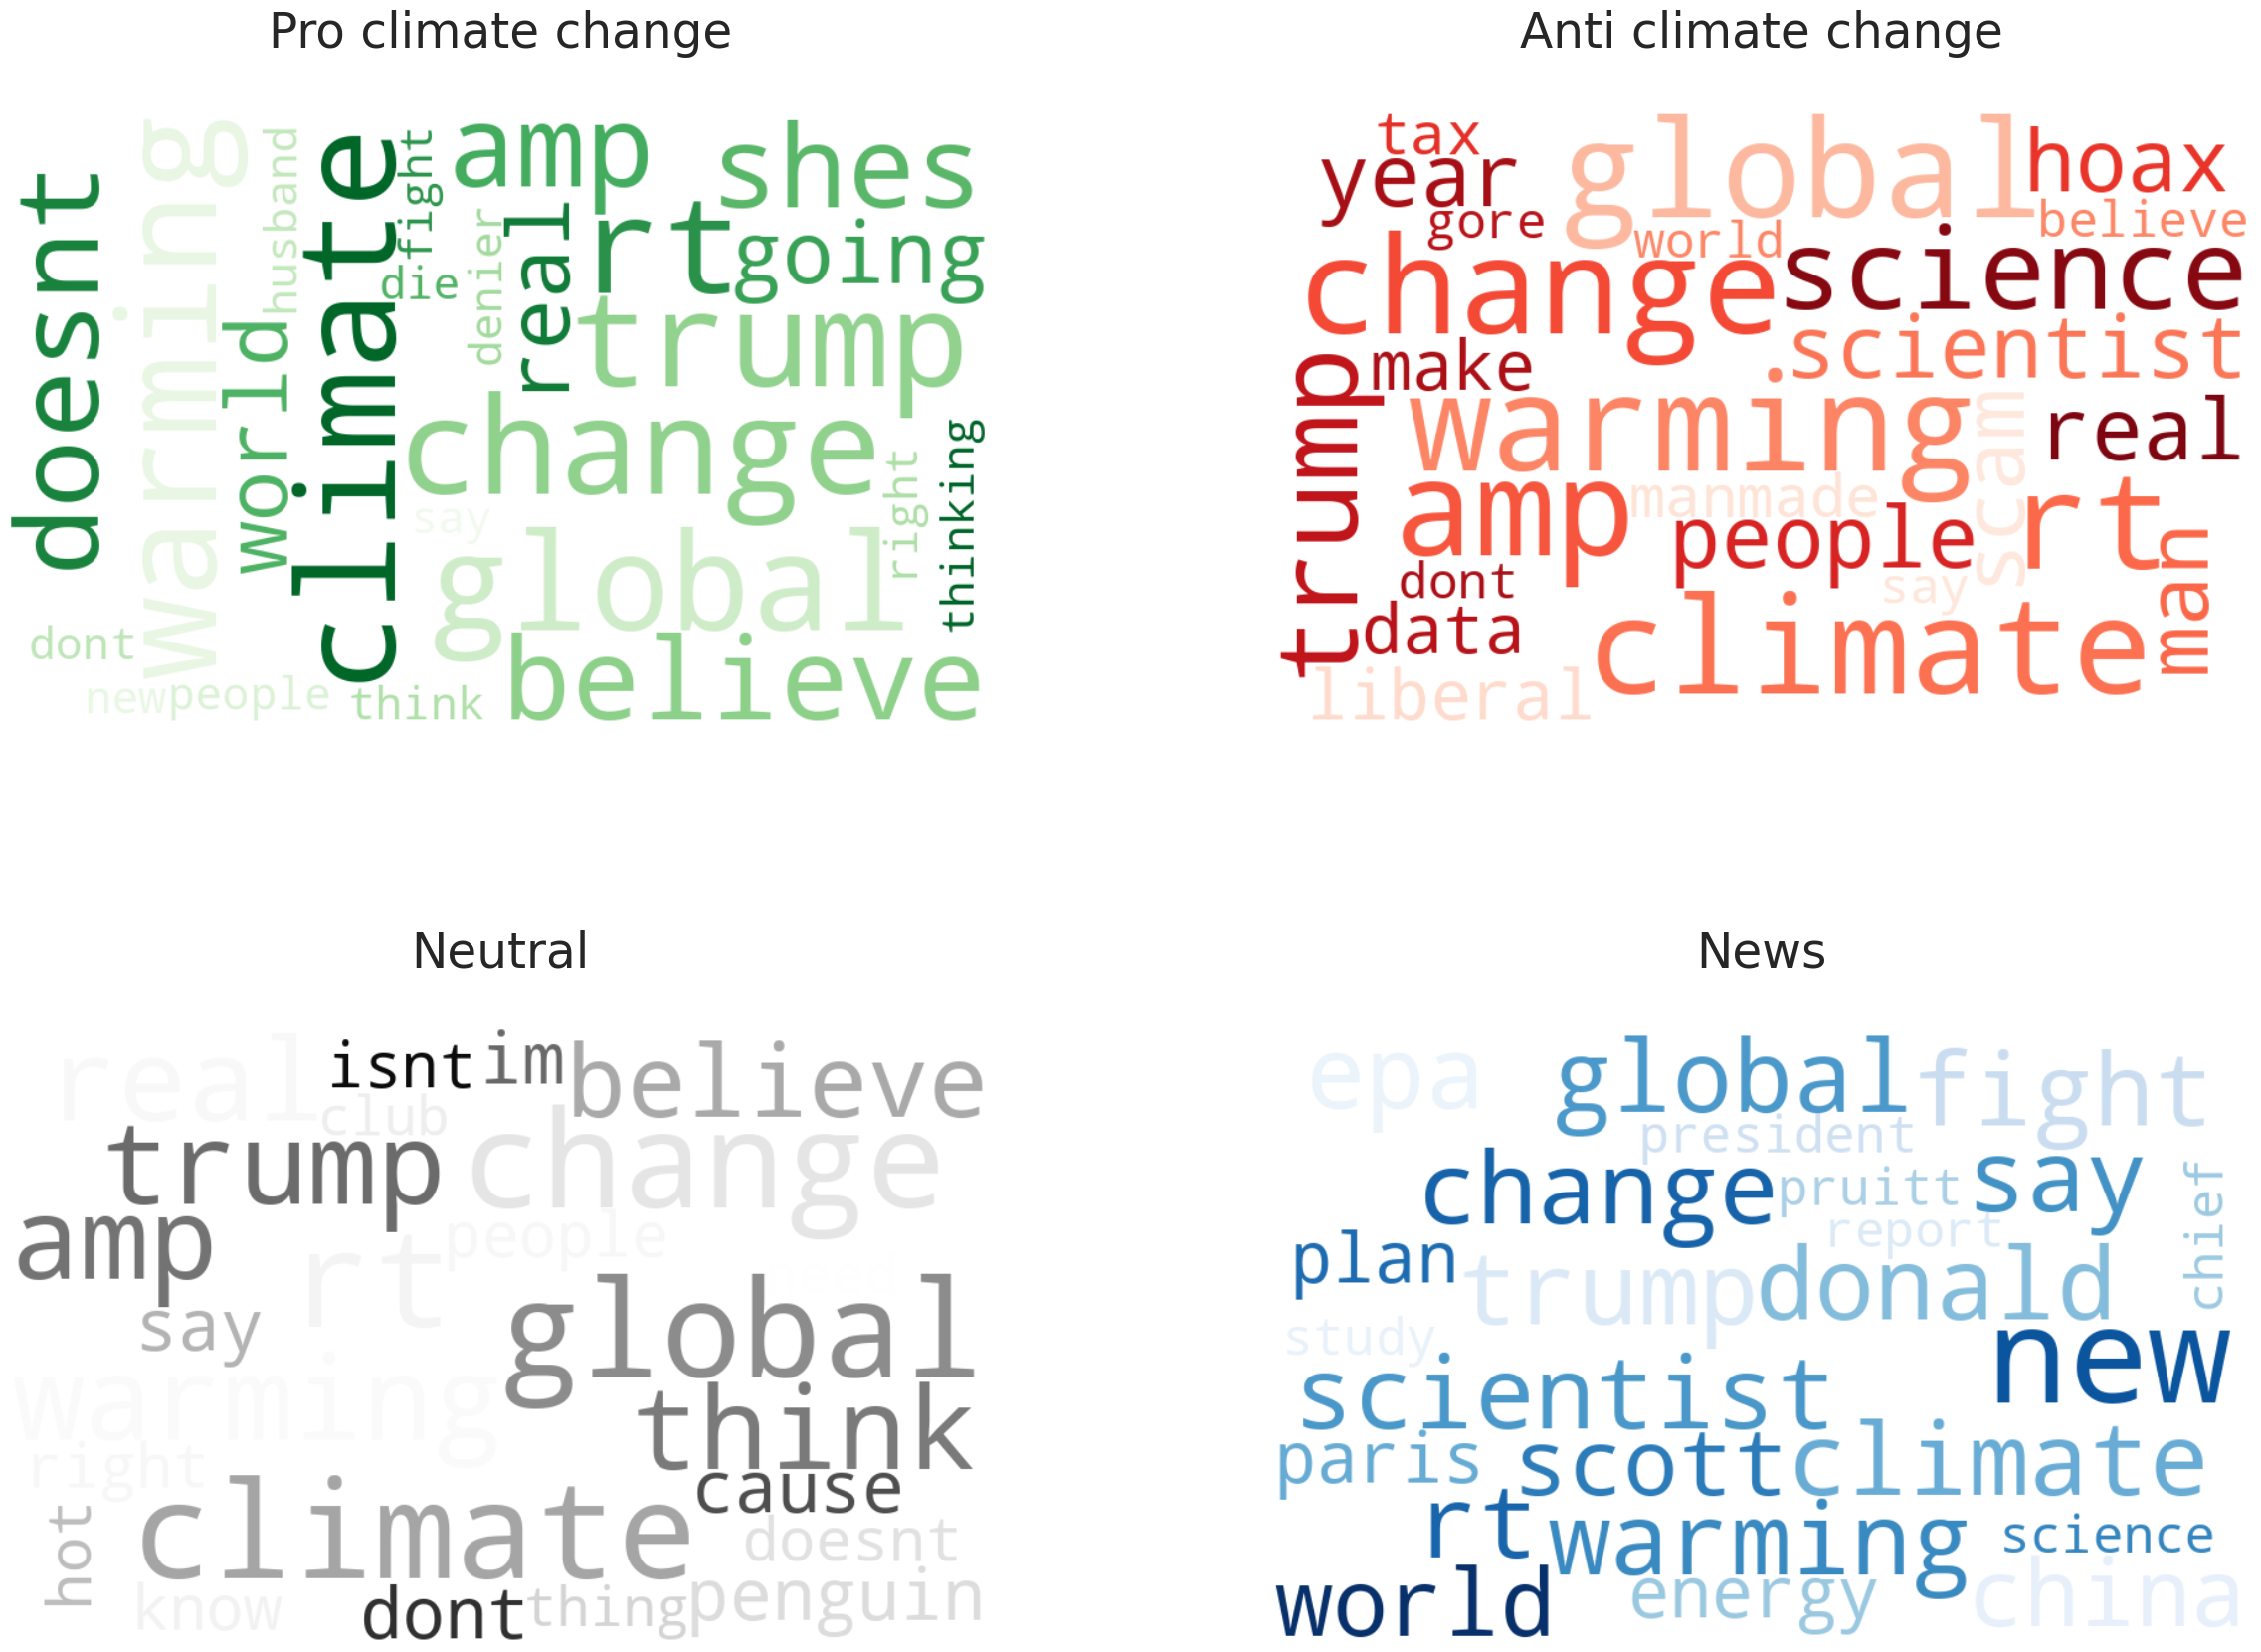

In [ ]:
# ... (code for generating word clouds)

# Plot pro and anti word clouds next to one another for comparison
f, axarr = plt.subplots(2, 2, figsize=(30, 20))

# Adjust vertical spacing between subplots
plt.subplots_adjust(hspace=0.5)  # Adjust hspace as needed

axarr[0, 0].imshow(pro_wordcloud, interpolation="bilinear")
axarr[0, 1].imshow(anti_wordcloud, interpolation="bilinear")
axarr[1, 0].imshow(neutral_wordcloud, interpolation="bilinear")
axarr[1, 1].imshow(news_wordcloud, interpolation="bilinear")

# Remove the ticks on the x and y axes
for ax in f.axes:
    plt.sca(ax)
    plt.axis('off')

axarr[0, 0].set_title('Pro climate change\n', fontsize=35)
axarr[0, 1].set_title('Anti climate change\n', fontsize=35)
axarr[1, 0].set_title('Neutral\n', fontsize=35)
axarr[1, 1].set_title('News\n', fontsize=35)

plt.show()


- Insights to be added!!

### 5.2 Hashtags

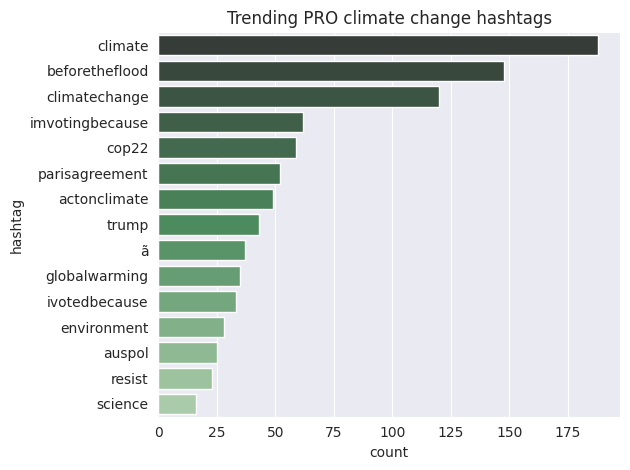

In [ ]:
# Plot a bar chart with the specified palette and adjusted concentration
# Get the number of unique hashtags
num_hashtags_1 = len(pro_hashtag['hashtag'].unique())

# Manually create a custom green color palette with reversed concentration
pro_palette = sns.color_palette("Greens_d", n_colors=num_hashtags_1 ,desat=0.8)[::-1]

# Plot a bar chart with the specified custom palette
sns.barplot(data=pro_hashtag, y='hashtag', x='count', palette=pro_palette)
plt.title('Trending PRO climate change hashtags')
plt.tight_layout()
plt.show()

- Insights to be added

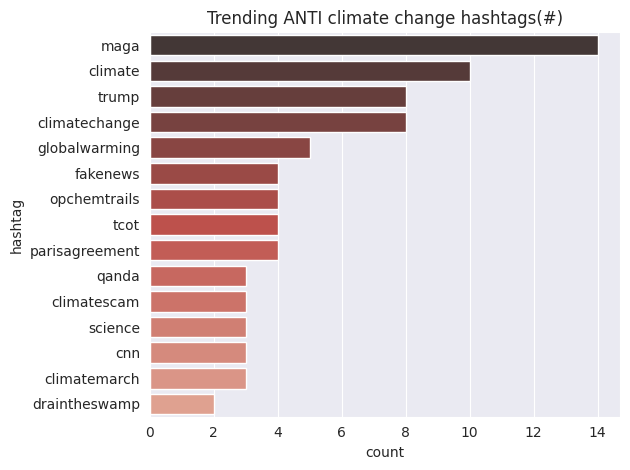

In [ ]:
# Plot a bar chart with the specified palette and adjusted concentration

num_hashtags_2 = len(anti_hashtag['hashtag'].unique())

# Manually create a custom green color palette with reversed concentration
anti_palette = sns.color_palette("Reds_d", n_colors=num_hashtags_2, desat=0.8)[::-1]

# Plot a bar chart with the specified custom palette
sns.barplot(data=anti_hashtag, y='hashtag', x='count', palette=anti_palette)
plt.title('Trending ANTI climate change hashtags(#)')
plt.tight_layout()
plt.show()

- Add insights later

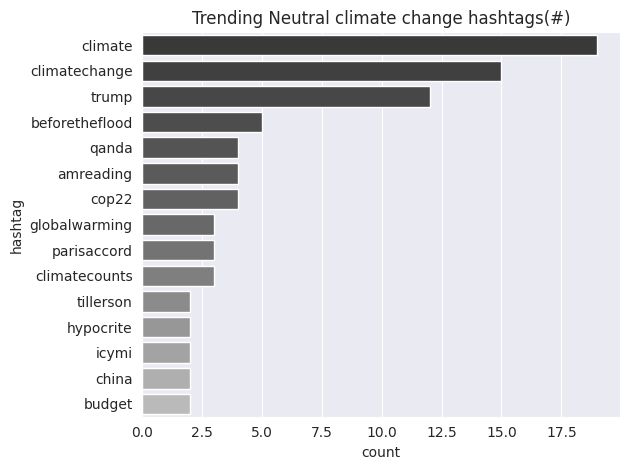

In [ ]:
# Plot a bar chart with the specified palette and adjusted concentration

num_hashtags_3 = len(anti_hashtag['hashtag'].unique())

# Manually create a custom green color palette with reversed concentration
neutral_palette = sns.color_palette("Greys_d", n_colors=num_hashtags_3, desat=0.8)[::-1]

# Plot a bar chart with the specified custom palette
sns.barplot(data=neutral_hashtag, y='hashtag', x='count', palette=neutral_palette)
plt.title('Trending Neutral climate change hashtags(#)')
plt.tight_layout()
plt.show()

- Add insights

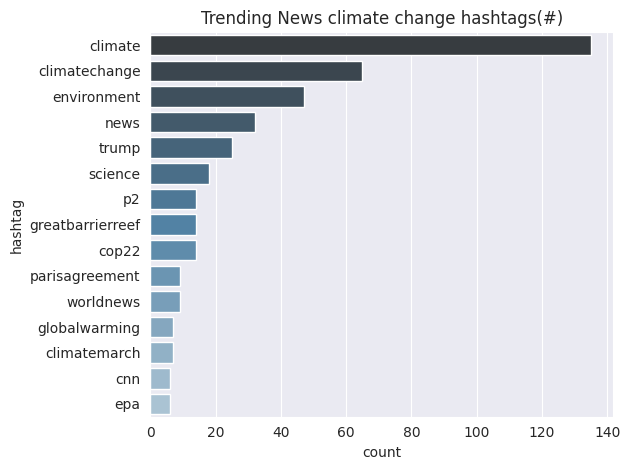

In [ ]:
# Plot a bar chart with the specified palette and adjusted concentration

num_hashtags_4 = len(anti_hashtag['hashtag'].unique())

# Manually create a custom green color palette with reversed concentration
neutral_palette = sns.color_palette("Blues_d", n_colors=num_hashtags_4, desat=0.8)[::-1]

# Plot a bar chart with the specified custom palette
sns.barplot(data=news_hashtag, y='hashtag', x='count', palette=neutral_palette)
plt.title('Trending News climate change hashtags(#)')
plt.tight_layout()
plt.show()

- Insights to be added

In [ ]:
# Check if they were correctly Seperated
print(df_train.shape)
print(df_test.shape)

(15819, 6)
(10546, 6)


### 5.3 Modeling Preparation

- Model preparation in the context of machine learning refers to the set of activities and steps taken to get a model ready for training and evaluation.
- Model preparation aims to create an environment in which the machine learning model can learn from the data effectively, make accurate predictions, and generalize well to new, unseen examples.


### 5.3.1 Handling Imbalanced Classes

### 5.3.2 Dataset Split

- The process of data splitting involves dividing the dataset into two subsets: one for `training` the machine learning model and another for `testing` its performance.
- The data will be split **80%** for `training` and teh remaining **20%** for `testing`.


In [ ]:
X = df_train['tokens'].apply(lambda tokens: " ".join(tokens))
Y = df_train['sentiment']

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

### 5.3.4 Vectorization -Term Frequency-Inverse Document Frequency (TF-IDF)

- **TF-IDF** is a numerical representation used in natural language processing to gauge the significance of words in individual documents.
- **TF-IDF** assigns higher weights to words that are both frequently used within specific tweets and relatively rare across the entire dataset.
-  This approach captures the distinctive language patterns within tweets, aiding in the accurate representation of textual data for sentiment analysis.


In [ ]:
# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5500)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
X_train_tfidf

<12655x5500 sparse matrix of type '<class 'numpy.float64'>'
	with 121289 stored elements in Compressed Sparse Row format>

In [ ]:
X_test_tfidf

<3164x5500 sparse matrix of type '<class 'numpy.float64'>'
	with 29520 stored elements in Compressed Sparse Row format>

# 6. Model Training

- The ultimate goal of model training is to create a robust and accurate sentiment classification model capable of generalizing well to new, unseen tweets.



**Models select for trainig:**

1. Random Forest
2. Logistic Regression
3. Support Vector Machine
4. Extra Trees
5. MLP Classifier
6. Voting Classifier

---
- This diverse set of models aims to capture a wide range of patterns within the Twitter data, allowing us to rigorously train and evaluate each model's performance to ultimately select the most effective sentiment classifier for our project.


### 6.1 Random Forest

- **Random Forest** functions as a sophisticated ensemble of decision-makers. Each decision-maker, represented as a *decision tree*, independently assesses *tweets*, focusing on distinct aspects of `sentiment`.
- Rather than relying on a singular viewpoint, **Random Forest** aggregates insights from all decision-makers. During the *prediction phase*, each decision-maker contributes a vote on the `sentiment` of a *tweet*.
- The final *sentiment prediction* is then determined by a consensus, favoring the `sentiment` with the majority of votes.


In [ ]:
# Create a pipeline with TF-IDF vectorizer and Random Forest Classifier
rf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5500)),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42)),
])

# Train the model using the pipeline
rf_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest Classifier")
print(f"Accuracy: {accuracy_rf:.2f}")

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Classifier
Accuracy: 0.69
Classification Report:
               precision    recall  f1-score   support

        -1.0       0.82      0.20      0.32       278
         0.0       0.56      0.30      0.39       425
         1.0       0.69      0.89      0.78      1755
         2.0       0.72      0.60      0.66       706

    accuracy                           0.69      3164
   macro avg       0.70      0.50      0.54      3164
weighted avg       0.69      0.69      0.66      3164



### 6.2 Logistic Regression

- **Logistic Regression** serves as a refined analytical tool. Operating as a singular decision-maker, it meticulously analyzes various linguistic features within *tweets*.
- **Logistic Regression** examines the language nuances in *tweets* with precision, aiming to discern patterns that indicate `sentiment`.
- Instead of providing a binary `sentiment` label, **Logistic Regression** generates probabilistic predictions. It calculates the likelihood of a tweet belonging to different `sentiment` classes, offering nuanced insights.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a pipeline
logistic_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5500)),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000)),
])

# Train the model using the pipeline
logistic_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logistic_pipeline = logistic_pipeline.predict(X_test)

# Evaluate the Logistic Regression model within the pipeline
accuracy_logistic_pipeline = accuracy_score(y_test, y_pred_logistic_pipeline)
print("\nLogistic Regression (Pipeline)")
print(f"Accuracy: {accuracy_logistic_pipeline:.2f}")

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred_logistic_pipeline))


Logistic Regression (Pipeline)
Accuracy: 0.72
Classification Report:
               precision    recall  f1-score   support

        -1.0       0.80      0.31      0.45       278
         0.0       0.60      0.36      0.45       425
         1.0       0.73      0.89      0.80      1755
         2.0       0.75      0.69      0.71       706

    accuracy                           0.72      3164
   macro avg       0.72      0.56      0.60      3164
weighted avg       0.72      0.72      0.70      3164



### 6.3 Support Vector Machine
- **Support Vector Machine** (SVM) serves as a powerful and adaptable decision-maker. Unlike an ensemble, **SVM** works independently, focusing on discerning `sentiment` patterns within tweets.
- **SVM** rigorously examines linguistic features within *tweets* to discern patterns indicative of `sentiment`. It seeks to understand the nuanced language expressions present in the dataset.
- **SVM** optimizes decision boundaries during training, aiming to create clear distinctions between different sentiment classes. This adaptability allows it to handle the diverse language styles found in *tweets*.


In [ ]:
# Create a pipeline for SVM
svm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features= 5500)),
    ('classifier', SVC(kernel='rbf', gamma=1, C=10, random_state=42)),
])

# Train the model using the pipeline
svm_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm_pipeline = svm_pipeline.predict(X_test)

# Evaluate the SVM model within the pipeline
accuracy_svm_pipeline = accuracy_score(y_test, y_pred_svm_pipeline)
print("\nSupport Vector Machine (Pipeline)")
print(f"Accuracy: {accuracy_svm_pipeline:.2f}")

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred_svm_pipeline))


Support Vector Machine (Pipeline)
Accuracy: 0.74
Classification Report:
               precision    recall  f1-score   support

        -1.0       0.77      0.41      0.53       278
         0.0       0.57      0.40      0.47       425
         1.0       0.75      0.88      0.81      1755
         2.0       0.77      0.72      0.74       706

    accuracy                           0.74      3164
   macro avg       0.71      0.60      0.64      3164
weighted avg       0.73      0.74      0.72      3164



### 6.4 Extra Trees
- **Extra Trees** plays a distinct role as a versatile and robust decision-maker. Unlike a single decision-maker, Extra Trees builds an ensemble of diverse trees, collectively contributing to `sentimen`t analysis.
- **Extra Trees** constructs multiple decision trees, each trained on different subsets of *tweet* features. This ensemble approach introduces diversity, capturing a wide range of `sentiment` patterns expressed in *tweets*.
-  **Extra Trees** operates as a versatile ensemble, leveraging diversity and consensus to provide accurate and robust predictions for *tweet* `sentiment`.


In [ ]:
# Create Extra Trees model
extra_trees_model = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Train the model
extra_trees_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred_extra_trees = extra_trees_model.predict(X_test_tfidf)

# Evaluate the Extra Trees model
accuracy_extra_trees = accuracy_score(y_test, y_pred_extra_trees)
print("\nExtra Trees Model")
print(f"Accuracy: {accuracy_extra_trees:.2f}")

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred_extra_trees))



Extra Trees Model
Accuracy: 0.72
Classification Report:
               precision    recall  f1-score   support

        -1.0       0.86      0.28      0.42       278
         0.0       0.61      0.35      0.44       425
         1.0       0.72      0.89      0.80      1755
         2.0       0.75      0.68      0.72       706

    accuracy                           0.72      3164
   macro avg       0.73      0.55      0.59      3164
weighted avg       0.72      0.72      0.70      3164



### 6.5 Multi-Layer Perceptron(MLP) Classifier

- The **Multi-Layer Perceptron**(MLP) Classifier serves as a sophisticated and adaptable decision-maker. Unlike traditional decision trees, **MLP** is a neural network-based model, capable of capturing complex patterns within *tweets*.
- The **MLP** Classifier is built on a neural network architecture, enabling it to learn intricate patterns and relationships within the diverse language expressions found in *tweets*.
- The **MLP** Classifier acts as a sophisticated decision-maker, leveraging neural network capabilities to analyze complex *tweet* patterns and provide nuanced predictions for **tweet** `sentiment`.


In [ ]:
# Create a pipeline with TF-IDF vectorization and MLPClassifier
mlp_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5500)),
    ('mlp', MLPClassifier(random_state=42, max_iter=1000))
])

# Train the MLPClassifier
mlp_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred_mlp = mlp_pipeline.predict(X_test)

# Evaluate the MLPClassifier
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print("\nMultilayer Perceptron (MLP) Classifier")
print(f"Accuracy: {accuracy_mlp:.2f}")

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred_mlp))


Multilayer Perceptron (MLP) Classifier
Accuracy: 0.67
Classification Report:
               precision    recall  f1-score   support

        -1.0       0.47      0.46      0.47       278
         0.0       0.41      0.44      0.42       425
         1.0       0.77      0.74      0.76      1755
         2.0       0.68      0.71      0.69       706

    accuracy                           0.67      3164
   macro avg       0.58      0.59      0.59      3164
weighted avg       0.68      0.67      0.67      3164



### 6.6 Voting Classifier

- **Voting Classifier** orchestrates a collaborative decision-making process, leveraging insights from multiple diverse models
- The Voting Classifier combines predictions from various underlying models which were `Logistic classifier`,`Extra Trees` & `SVM classifier`.
- By aggregating predictions through a voting mechanism, the Voting Classifier fosters consensus. The final `sentiment` prediction for a tweet is determined by the majority vote among the diverse ensemble of models.


In [ ]:
# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5500)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Create individual classifiers
logistic_classifier = LogisticRegression(random_state=42, max_iter=1000)
extra_trees_classifier = ExtraTreesClassifier(n_estimators=100, random_state=42)
svm_classifier = SVC(kernel='rbf', gamma=1, C=10, probability=True, random_state=42)

# Create a Voting Classifier with 'soft' voting (probability weights)
voting_classifier = VotingClassifier(
    estimators=[('logistic', logistic_classifier), ('extra_trees', extra_trees_classifier), ('svm', svm_classifier)],
    voting='soft'
)

# Train the model
voting_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred_ensemble = voting_classifier.predict(X_test_tfidf)

# Evaluate the ensemble model
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print("\nEnsemble (Voting Classifier)")
print(f"Accuracy: {accuracy_ensemble:.2f}")

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred_ensemble))


Ensemble (Voting Classifier)
Accuracy: 0.74
Classification Report:
               precision    recall  f1-score   support

        -1.0       0.81      0.39      0.52       278
         0.0       0.61      0.37      0.46       425
         1.0       0.74      0.90      0.81      1755
         2.0       0.78      0.71      0.74       706

    accuracy                           0.74      3164
   macro avg       0.74      0.59      0.64      3164
weighted avg       0.74      0.74      0.72      3164



# 7. Model Evaluation

- **Model evaluation** is the process of systematically assessing the performance and effectiveness of a `sentiment` classification model trained on data with *tweets*.
- This critical step involves analyzing how well the model generalizes to new, unseen *tweets* and accurately predicts their `sentiment` labels.

---
 The performance of each model will be evaluated based on the **precision**, **accuracy** and **F1 score** achieved.We will be looking at the following to determine and visualize these metrics:

 - Classification reports
 - We will see


#### 7.1 Random Forest

#### 7.2 Logistic Regression

#### 7.3 Support Vector Machine

#### 7.4 Extra Trees

#### 7.5 Multi-Layer Perceptron(MLP) Classifier



#### 7.6 Voting Classifier

# 8. Model Evaluation - Selecting Best Model

In [ ]:
# Evaluate the best model on the testing set

# 9. Best Model Explanation

# Submissions

In [ ]:
#

In [ ]:
# Create a submission file


#### Summary of Regression overview

In [ ]:
# have a Notebook Introduction
# Have an actual Nobook conclusion
# Talk about what we were doing and if we succeded
# How well do we you mark downs and comments
# Explain every thing
# Add visuals or images
# Be able to click (table of content)
# Be clear in the compents (helps the reader understand what is happening)
# Explain Models and how they work
# Path for kaggle competition & Submission file
# Trello what we prepared, did,done
# Questions to ask supervisor
# Customize TRELLO BACKGROUND